<a href="https://colab.research.google.com/github/haedongmu/AIFFEL_quest_cr/blob/main/Project/CNN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 필요한 라이브러리 불러오기

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 개와 고양이 데이터 준비

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 개와 고양이 이미지가 저장된 경로를 각 변수에 저장

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
# train 데이터와 validation 데이터의 개수 확인

num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# 파라미터 설정

batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [7]:
# 데이터 시각화

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# 데이터의 양을 증가시키는 generator 세팅

# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [9]:
# directory와 작업 환경 연결

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
# Data Augmentation 확인

train_data_gen[0][0].shape

(16, 256, 256, 3)

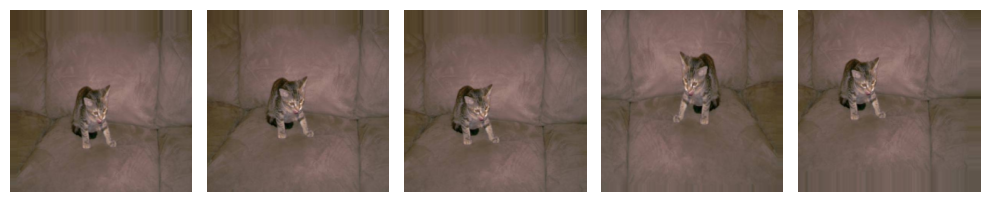

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Validation 데이터에도 train 데이터와 같은 동일한 작업 적용

# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [13]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


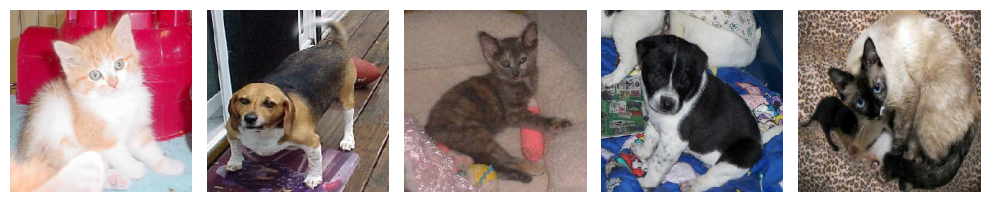

In [14]:
# Validation 데이터 확인

sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [15]:
_[:5] # 정답 데이터

array([0., 1., 0., 1., 0.], dtype=float32)

In [16]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.

# VGG16 모델 구현
input_layer = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, 3)) # VGG16의 입력 크기

# Block 1
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 2
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 3
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 4
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 5
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Fully Connected Layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

# 모델 요약 출력
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,136,577 (88.26 MB)

 Trainable params: 23,136,577 (88.26 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 손실함수, optimizer, metric 설정

loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.binary_accuracy]
)

In [18]:
# 모델 학습

history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size,
      epochs=5,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 102s 522ms/step - binary_accuracy: 0.4700 - loss: 0.7845 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 377ms/step - binary_accuracy: 0.5060 - loss: 0.6931 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 376ms/step - binary_accuracy: 0.4963 - loss: 0.6932 - val_binary_accuracy: 0.5000 - val_loss: 0.6931


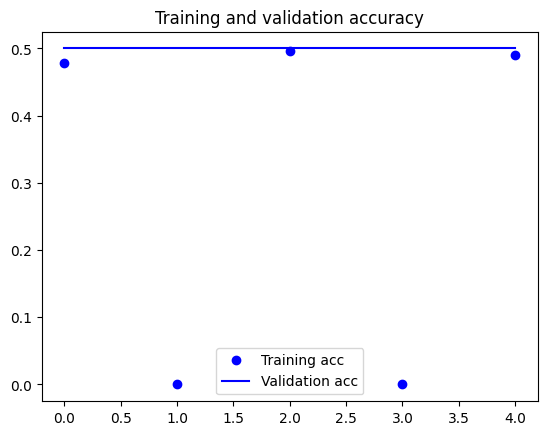

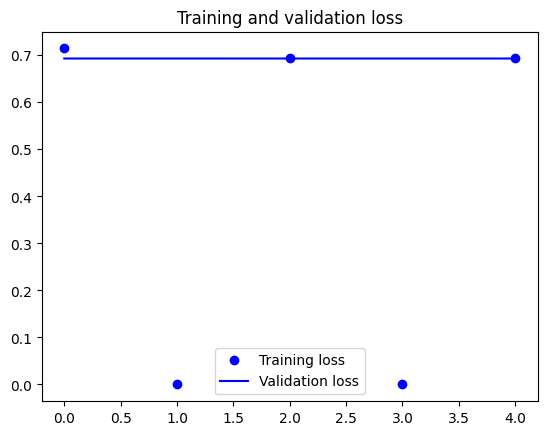

In [19]:
# 학습 정확도 확인

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# 학습 및 검증 정확도 확인
final_train_accuracy = history.history['binary_accuracy'][-1]
final_val_accuracy = history.history['val_binary_accuracy'][-1]

print(f'Final Training Accuracy: {final_train_accuracy:.2f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.2f}')

Final Training Accuracy: 0.49
Final Validation Accuracy: 0.50


In [23]:
# 필요한 라이브러리 불러오기

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [34]:
batch_size = 32  # 배치 크기 증가
epochs = 20      # 학습 횟수 증가
IMG_HEIGHT = 256
IMG_WIDTH = 256
learning_rate = 0.0001  # 학습률 감소
dropout_rate = 0.5  # Dropout 추가

In [35]:
train_image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = val_image_gen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
# Pre-trained VGG16 모델 로드
pretrained_base = VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
pretrained_base.trainable = False  # 초기에는 가중치 고정

# 커스텀 모델 추가
x = tf.keras.layers.Flatten()(pretrained_base.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout 추가
x = tf.keras.layers.BatchNormalization()(x)  # BatchNormalization 추가
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout 추가
x = tf.keras.layers.BatchNormalization()(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = tf.keras.Model(pretrained_base.input, output_layer)

In [37]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [38]:
# 모델 학습

steps_per_epoch = (len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size

history = model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,  # steps_per_epoch 변수 사용
    epochs=epochs,
    validation_data=val_data_gen,
    validation_freq=1
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 45s 603ms/step - accuracy: 0.5928 - loss: 0.7828 - val_accuracy: 0.7120 - val_loss: 0.5329
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.6250 - loss: 0.6141 - val_accuracy: 0.7150 - val_loss: 0.5314
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 581ms/step - accuracy: 0.6467 - loss: 0.6701 - val_accuracy: 0.6980 - val_loss: 0.5277
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6250 - loss: 0.6084 - val_accuracy: 0.6940 - val_loss: 0.5343
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 76s 569ms/step - accuracy: 0.6945 - loss: 0.5924 - val_accuracy: 0.8570 - val_loss: 0.3807
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6562 - loss: 0.7774 - val_accuracy: 0.8640 - val_loss: 0.3805
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 578ms/step - accuracy: 0.6991 - loss: 0.5932 - val_accuracy: 0.8640 - val_loss: 0.3590
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7500 - loss: 0.5595 - val_accuracy: 0.

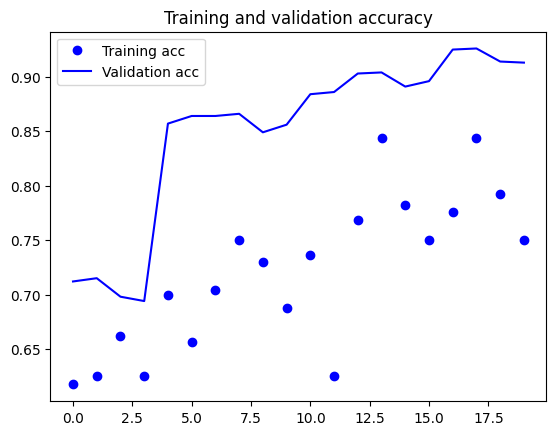

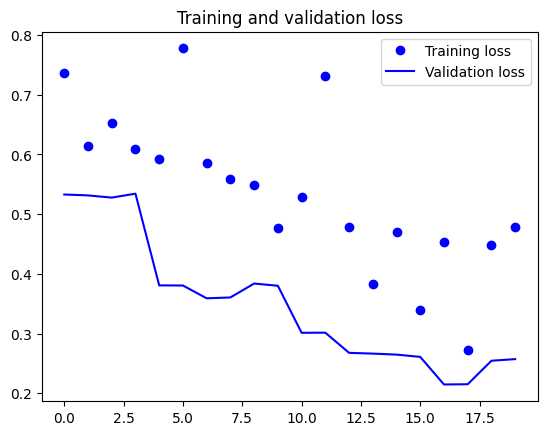

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
!pip3 install tensorflow-estimator==2.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.9/462.9 kB 8.6 MB/s eta 0:00:00


In [26]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [27]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [28]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False):

  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [29]:
def draw_bounding_box_on_image(image,
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)

    # BBox 테두리 그리기
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
               (left, top)],
              width=thickness,
              fill=color)

    # 텍스트 높이 계산
    display_str_heights = [(font.getbbox(ds)[3] - font.getbbox(ds)[1]) for ds in display_str_list]
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height

    for display_str in display_str_list[::-1]:
        # 텍스트 크기 계산
        text_width = font.getbbox(display_str)[2] - font.getbbox(display_str)[0]
        text_height = font.getbbox(display_str)[3] - font.getbbox(display_str)[1]
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


In [30]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Found 100 objects.
Inference time:  43.21154999732971


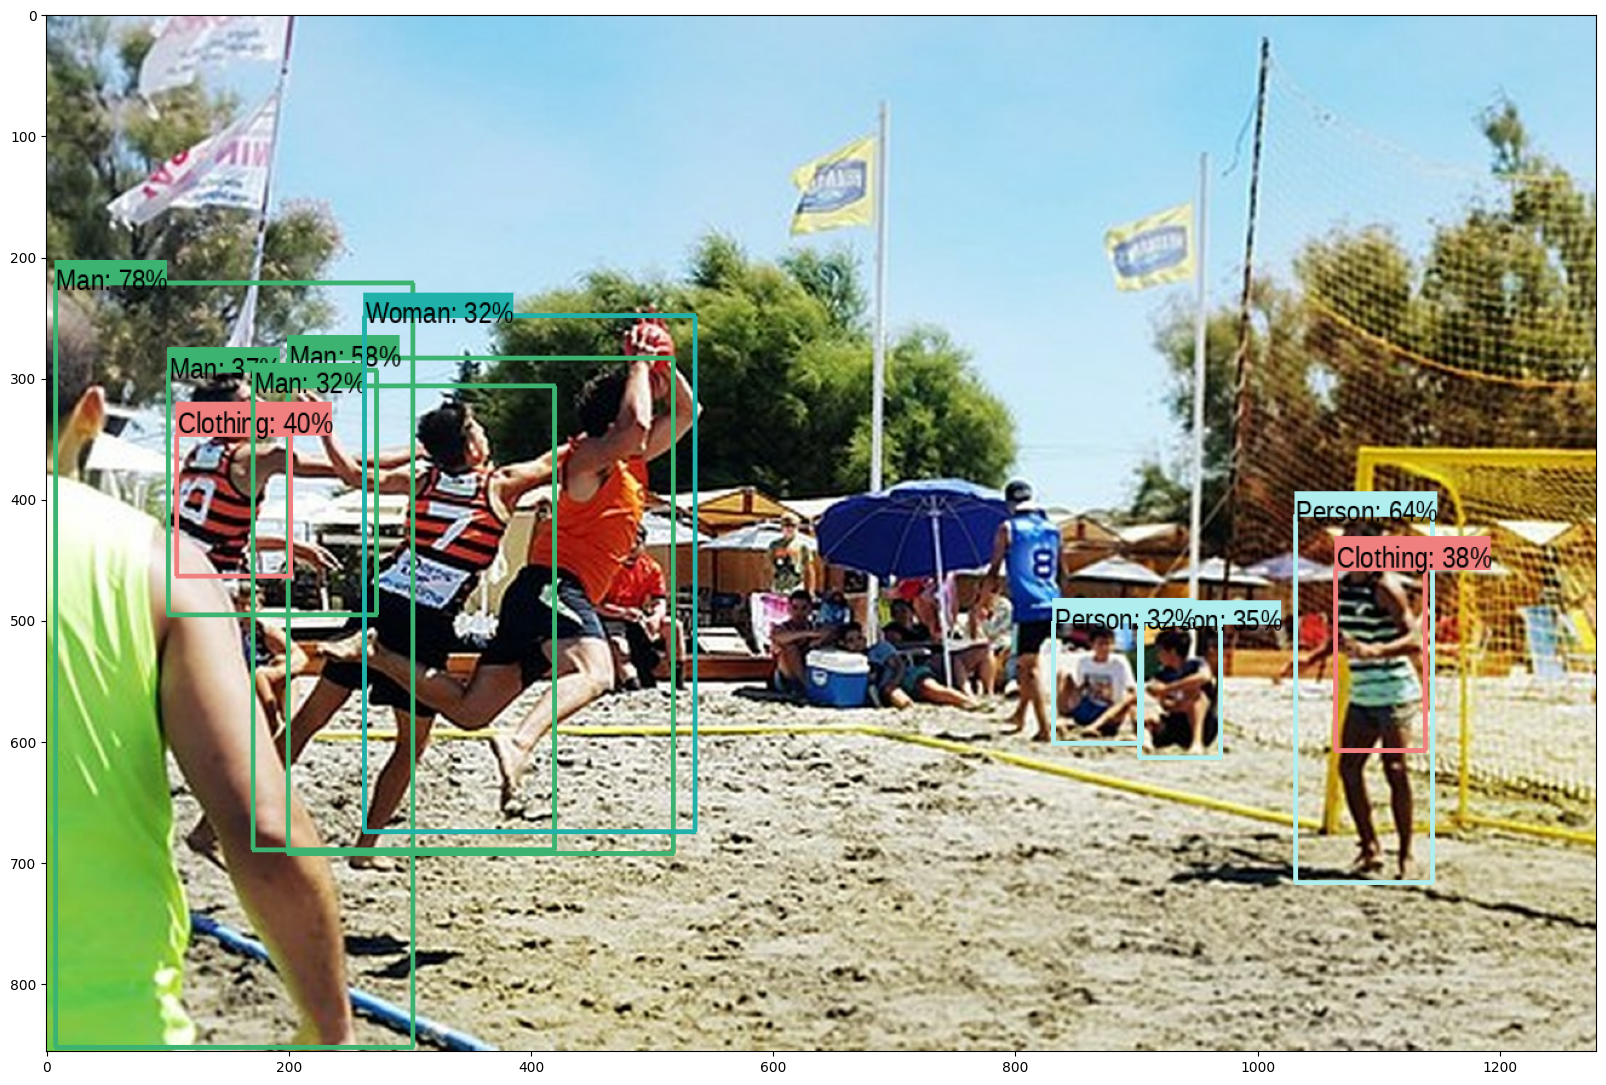

In [66]:
from PIL import Image, ImageOps

def download_and_resize_image(url, new_width, new_height, display=False):
    # URL에서 이미지 다운로드
    import requests
    from io import BytesIO

    response = requests.get(url)
    image_data = BytesIO(response.content)  # 이미지 읽기

    pil_image = Image.open(image_data)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.Resampling.LANCZOS)  # 이미지 조정
    pil_image_rgb = pil_image.convert("RGB")  # RGB로 변환

    # 이미지 저장
    filename = "resized_image.jpg"
    pil_image_rgb.save(filename, format="JPEG", quality=90)

    # 저장된 이미지 확인
    if display:
        pil_image_rgb.show()

    return filename

# 사용 예시
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

# TensorFlow Hub를 임포트
import tensorflow_hub as hub

module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img


def run_detector(detector, path):
    img = load_img(path)

    converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

    # 소요시간 측정
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key:value.numpy() for key,value in result.items()}

    # 이미지 추론 개수와 추론 시간 출력
    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time-start_time)

    # 이미지 내 박스로 entity, scores를 추가하여 출력
    image_with_boxes = draw_boxes(
        img.numpy(), result["detection_boxes"],
        result["detection_class_entities"], result["detection_scores"])

    display_image(image_with_boxes)

run_detector(detector, downloaded_image_path)

In [70]:
# 이미지 불러오기
image_url = "https://drive.google.com/uc?id=147OtlmE-cdPUwsiHQPSanbNzA6kLOzq1"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

module_handle = "https://tfhub.dev/tensorflow/efficientdet/d0/1"
detector = hub.load(module_handle)
print("Model loaded successfully.")

# 테스트
run_detector(detector, downloaded_image_path)


Model loaded successfully.


TypeError: Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(1, 856, 1280, 3), dtype=tf.float32, name=None) to TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name=None)`. Received args: (<tf.Tensor: shape=(1, 856, 1280, 3), dtype=float32, numpy=
array([[[[0.9333334 , 0.86666673, 0.80392164],
         [0.93725497, 0.8705883 , 0.8078432 ],
         [0.9450981 , 0.87843144, 0.81568635],
         ...,
         [0.53333336, 0.47058827, 0.32941177],
         [0.53333336, 0.47058827, 0.32941177],
         [0.53333336, 0.47058827, 0.32941177]],

        [[0.5372549 , 0.47058827, 0.40000004],
         [0.5411765 , 0.47450984, 0.4039216 ],
         [0.54509807, 0.4784314 , 0.40784317],
         ...,
         [0.53333336, 0.47058827, 0.32941177],
         [0.53333336, 0.47058827, 0.32941177],
         [0.53333336, 0.47058827, 0.32941177]],

        [[0.52156866, 0.45098042, 0.3647059 ],
         [0.5254902 , 0.454902  , 0.36862746],
         [0.5254902 , 0.454902  , 0.36862746],
         ...,
         [0.5294118 , 0.47058827, 0.31764707],
         [0.5294118 , 0.47058827, 0.31764707],
         [0.5294118 , 0.47058827, 0.31764707]],

        ...,

        [[0.29803923, 0.27058825, 0.16078432],
         [0.28627452, 0.25882354, 0.14901961],
         [0.30588236, 0.2784314 , 0.16862746],
         ...,
         [0.30980393, 0.24705884, 0.14901961],
         [0.30980393, 0.24705884, 0.14901961],
         [0.32156864, 0.25882354, 0.16078432]],

        [[0.30588236, 0.2784314 , 0.16862746],
         [0.29411766, 0.26666668, 0.15686275],
         [0.30980393, 0.28235295, 0.17254902],
         ...,
         [0.3137255 , 0.2509804 , 0.15294118],
         [0.3137255 , 0.2509804 , 0.15294118],
         [0.3254902 , 0.2627451 , 0.16470589]],

        [[0.3019608 , 0.27450982, 0.16470589],
         [0.2901961 , 0.2627451 , 0.15294118],
         [0.30980393, 0.28235295, 0.17254902],
         ...,
         [0.3137255 , 0.2509804 , 0.15294118],
         [0.31764707, 0.25490198, 0.15686275],
         [0.3254902 , 0.2627451 , 0.16470589]]]], dtype=float32)>,) and kwargs: {} for signature: (input_tensor: TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name=None)).